# Нейронная сеть с нуля: Keras, ключевые параметры сети

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [3]:
import tensorflow as tf
print(tf.__version__)
msg = tf.constant('TesorFlow 2.0 Hello World')
tf.print(msg)

2.5.0
TesorFlow 2.0 Hello World


In [4]:
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad

In [5]:
from tensorflow import keras
from keras import models
from keras import layers

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse, r2_score as r2
import seaborn as sns

In [6]:
def evaluate_preds(true_values, pred_values, save=False, vis=True):
    """Оценка качества модели и график prevs vs true"""
    if vis:
        print("R2:\t" + str(np.round(r2(true_values, pred_values), 5)) + "\n" +
             "RMSE:\t" + str(np.round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
             "MSE:\t" + str(np.round(mse(true_values, pred_values), 3)))
        
        plt.figure(figsize=(8,8))
        
        sns.scatterplot(x=pred_values, y=true_values)
        plt.plot([0, np.max(pred_values)], [0, np.max(true_values)], linestyle='--', color='black') # диагональ, где true_values = pred_values
        
        plt.xlabel('Predicted values')
        plt.ylabel('True_values')
        plt.title('True vs Predicted values')
        
        if save == True:
            plt.savefig(REPORTS_FILE_PATH + 'report.png')
        plt.show()
        
    return np.round(r2(true_values, pred_values), 5), np.round(np.sqrt(mse(true_values, pred_values)), 3), np.round(mse(true_values, pred_values), 3)

In [7]:
X, y = load_boston(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
# X_train.reshape(33,339)
X_train.shape

(339, 13)

In [9]:
X_train

array([[1.02330e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.79700e+02, 1.80300e+01],
       [6.71910e-01, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.76880e+02, 1.48100e+01],
       [1.44550e-01, 1.25000e+01, 7.87000e+00, ..., 1.52000e+01,
        3.96900e+02, 1.91500e+01],
       ...,
       [1.50100e-02, 8.00000e+01, 2.01000e+00, ..., 1.70000e+01,
        3.90940e+02, 5.99000e+00],
       [1.11604e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        1.09850e+02, 2.32700e+01],
       [2.28760e-01, 0.00000e+00, 8.56000e+00, ..., 2.09000e+01,
        7.08000e+01, 1.06300e+01]])

In [10]:
y_test.shape

(167,)

In [11]:
y_train

array([14.6, 16.6, 27.1, 20.1, 19.8, 21. , 41.3, 23.2, 20.4, 18.5, 29.4,
       36.4, 24.4, 11.8, 13.8, 12.3, 17.8, 33.1, 26.7, 13.4, 14.4, 50. ,
       22. , 19.9, 23.8, 17.5, 12.7,  5.6, 31.1, 26.2, 19.4, 16.7, 13.8,
       22.9, 15.3, 27.5, 36.1, 22.9, 24.5, 25. , 50. , 34.9, 31.7, 24.1,
       22.1, 14.1, 42.8, 19.3, 32.2, 26.4, 21.8, 21.7,  8.3, 46.7, 43.1,
       31.5, 10.5, 16.7, 20. , 33.3, 17.8, 50. , 20.5, 23.2, 13.1, 19.6,
       22.8, 28.7, 30.7, 22.9, 21.9, 23.9, 32.7, 24.3, 21.5, 24.6,  8.5,
       26.4, 23.1, 15. ,  8.8, 19.3, 23.9, 24.7, 19.8, 23.8, 13.3, 29. ,
       27.1, 34.6, 13.3, 15.6, 12.5, 14.6, 11. , 24.8, 17.3,  8.1, 21.4,
       15.6, 23.3, 32. , 38.7, 30.1, 20.5, 32.5, 42.3, 24.3, 20.6, 22. ,
       18.2, 15. ,  6.3, 20.1, 21.4, 28.4, 30.1, 20.8, 23. , 14.3, 11.7,
       37.3, 17.1, 10.4, 23. , 22.7, 20.3, 21.7, 50. ,  8.4, 18.8, 37.2,
       16.1, 16.5, 22.2, 20.6, 13.5, 48.3, 23.8, 22.7, 17.4, 30.3, 36. ,
       41.7, 18.3, 22. , 18.6, 44.8, 11.9, 18.7, 16

# Тестовый прогон

Будем использовать обычные плотные, полносвязанные нейронные сети с разным количеством нейронов.

In [12]:
model_test = models.Sequential() # создает модель
model_test.add(layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],))) # добавление слоя на 1024 нейрона с активационной функцией 'relu'
model_test.add(layers.Dense(1024, activation='relu'))
model_test.add(layers.Dense(1))

In [13]:
model_test.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              14336     
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1025      
Total params: 1,064,961
Trainable params: 1,064,961
Non-trainable params: 0
_________________________________________________________________


In [14]:
model_test.compile(optimizer='adam',
                  loss=tf.keras.losses.MeanSquaredError(),
                  metrics=['mean_absolute_error'])

hist1=model_test.fit(X_train, y_train, epochs=5)

Epoch 1/5
11/11 [==============================] - 12s 8ms/step - loss: 4664.5907 - mean_absolute_error: 51.4679
Epoch 2/5
11/11 [==============================] - 0s 8ms/step - loss: 959.3516 - mean_absolute_error: 26.5794
Epoch 3/5
11/11 [==============================] - 0s 8ms/step - loss: 289.5175 - mean_absolute_error: 13.5542
Epoch 4/5
11/11 [==============================] - 0s 8ms/step - loss: 154.3050 - mean_absolute_error: 10.2175
Epoch 5/5
11/11 [==============================] - 0s 8ms/step - loss: 114.2177 - mean_absolute_error: 8.7236


In [15]:
y_pred_test = model_test.predict(X_test)
y_pred_test.shape

(167, 1)

In [16]:
y_test.shape

(167,)

R2:	-0.03773
RMSE:	8.862
MSE:	78.534


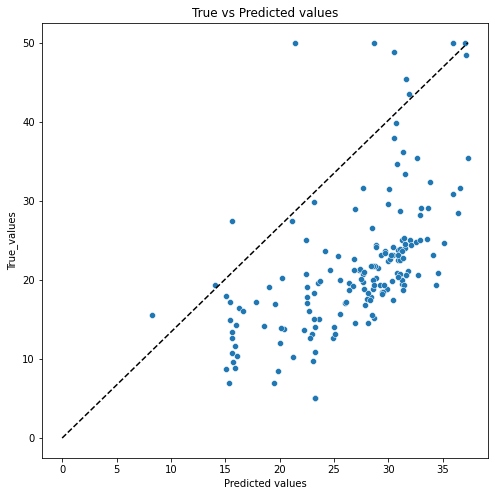

(-0.03773, 8.862, 78.534)

In [17]:
evaluate_preds(y_test, y_pred_test.copy().flatten())
# mse - минимальное среднеквадратичное отклонение
# rmse - корень из mse
# r2 - отношение дисперсий, насколько близко разброс исходных данных повторяет разброс конечных данных

# Варьируем количество нейронов, слоёв и прочее

In [18]:
model_1 = models.Sequential()
model_1.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_1.add(layers.Dense(64, activation='relu'))
model_1.add(layers.Dense(1))

model_2 = models.Sequential()
model_2.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_2.add(layers.Dense(1))

model_3 = models.Sequential()
model_3.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(1))

model_4 = models.Sequential()
model_4.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(1))

In [21]:
l = [2, 1, 5, 10]
i = 0

res_list = []

for model in [model_1, model_2, model_3, model_4]:
    
    res = {}
    
    model.compile(optimizer='adam',
                 loss=tf.keras.losses.MeanSquaredError(),
                 metrics=['mean_absolute_error'])
    
    model.fit(X_train, y_train, epochs=5, verbose=False)
    y_pred_test = model.predict(X_test)
    
    #r2, rmse, mse = evaluate_preds(y_test, y_pred_test.flatten(), vis=False)
    
    res['l'] = l[i]
    i += 1
    res['r2'] = round(r2(y_test, y_pred_test.copy().flatten()),5)
    res['rmse'] = round(np.sqrt(mse(y_test, y_pred_test.copy().flatten())),5)
    res['mse'] = round(mse(y_test, y_pred_test.copy().flatten()),5)
    
    res_list.append(res)

In [22]:
from pprint import pprint

In [23]:
pprint(res_list)

[{'l': 2, 'mse': 40.29276, 'r2': 0.46758, 'rmse': 6.34766},
 {'l': 1, 'mse': 307.02387, 'r2': -3.05695, 'rmse': 17.5221},
 {'l': 5, 'mse': 47.82333, 'r2': 0.36807, 'rmse': 6.91544},
 {'l': 10, 'mse': 63.57482, 'r2': 0.15994, 'rmse': 7.97338}]


5 слоев оптимальнее

In [29]:
"""Проверяем количество нейронов"""

res_list = []

for n in [1, 2, 3, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]:
    
    res = {}
    
    """Используем 2 слоя для проверки"""
    model_n = models.Sequential()
    model_n.add(layers.Dense(n, activation='relu', input_shape=(X_train.shape[1],)))
    model_n.add(layers.Dense(n, activation='relu'))
    model_n.add(layers.Dense(1))
    
    model_n.compile(optimizer='adam',
                   loss=tf.keras.losses.MeanSquaredError(),
                   metrics=['mean_absolute_error'])
    model_n.fit(X_train, y_train, epochs=5,
               verbose=False)
    y_pred_test = model_n.predict(X_test)
    
    #r2, rmse, mse = evaluate_preds(y_test, y_pred_test.flatten(), vis=False)

    res['n'] = n
    res['r2'] = round(r2(y_test, y_pred_test.copy().flatten()),5)
    res['rmse'] = round(np.sqrt(mse(y_test, y_pred_test.copy().flatten())), 5)
    res['mse'] = round(mse(y_test, y_pred_test.copy().flatten()), 5)
    
    res_list.append(res)

In [30]:
pprint(res_list)

[{'mse': 541.7589, 'n': 1, 'r2': -6.15869, 'rmse': 23.27571},
 {'mse': 220.06181, 'n': 2, 'r2': -1.90785, 'rmse': 14.83448},
 {'mse': 38302.43743, 'n': 3, 'r2': -505.12041, 'rmse': 195.71009},
 {'mse': 4953.50246, 'n': 8, 'r2': -64.45455, 'rmse': 70.38112},
 {'mse': 122.87447, 'n': 16, 'r2': -0.62364, 'rmse': 11.08488},
 {'mse': 61.79413, 'n': 32, 'r2': 0.18347, 'rmse': 7.86092},
 {'mse': 94.16967, 'n': 64, 'r2': -0.24434, 'rmse': 9.70411},
 {'mse': 85.85812, 'n': 128, 'r2': -0.13451, 'rmse': 9.26597},
 {'mse': 58.81429, 'n': 256, 'r2': 0.22284, 'rmse': 7.66905},
 {'mse': 61.04389, 'n': 512, 'r2': 0.19338, 'rmse': 7.81306},
 {'mse': 92.09437, 'n': 1024, 'r2': -0.21692, 'rmse': 9.59658},
 {'mse': 52.46069, 'n': 2048, 'r2': 0.3068, 'rmse': 7.24298}]


256 нейрона - оптимальнее

# Типы оптимизаторов

Оптимизаторы - это такие функции, методы, которые позволяют рассчитывать значения переменной на каждом из шагов.

Один из примеров - градиентный спуск, один из простых методов и известных, однако дает большое количество ошибок.

In [39]:
res_list = []

for opt in ['adam', 'RMSprop', 'Ftrl', 'Nadam', 'Adamax']:
    
    res = {}
    
    model_o = models.Sequential()
    model_o.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
    model_o.add(layers.Dense(256, activation='relu'))
    model_o.add(layers.Dense(1))
    
    model_o.compile(optimizer=opt,
                   loss=tf.keras.losses.MeanSquaredError(),
                   metrics=['mean_absolute_error'])
    
    model_o.fit(X_train, y_train, epochs=5,
               verbose=False)
    y_pred_test = model_o.predict(X_test)
    
    #r2, rmse, mse = evaluate_preds(y_test, y_pred_test.flatten(), vis=False)
    #print(y_pred_test)
    
    res['o'] = opt
    res['r2'] = round(r2(y_test, y_pred_test.copy().flatten()),5)
    res['rmse'] = round(np.sqrt(mse(y_test, y_pred_test.copy().flatten())), 5)
    res['mse'] = round(mse(y_test, y_pred_test.copy().flatten()), 5)
    
    res_list.append(res)

In [40]:
pprint(res_list)

[{'mse': 45.90501, 'o': 'adam', 'r2': 0.39342, 'rmse': 6.77532},
 {'mse': 195.57431, 'o': 'RMSprop', 'r2': -1.58428, 'rmse': 13.98479},
 {'mse': 61.97244, 'o': 'Ftrl', 'r2': 0.18111, 'rmse': 7.87226},
 {'mse': 92.4579, 'o': 'Nadam', 'r2': -0.22172, 'rmse': 9.6155},
 {'mse': 55.51543, 'o': 'Adamax', 'r2': 0.26643, 'rmse': 7.45087}]


'adam' - лучше

# Большой тесть всего со всем

In [45]:
res_list = []

for opt in ['adam', 'RMSprop', 'Ftrl', 'Nadam', 'Adamax']:
    for n in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]:
        for metrics in ['mean_absolute_error', 'mean_squared_error']:
            for loss in [tf.keras.losses.MeanSquaredError(), tf.keras.losses.MeanAbsoluteError()]:

                model_1 = models.Sequential()
                model_1.add(layers.Dense(n, activation='relu', input_shape=(X_train.shape[1],)))
                model_1.add(layers.Dense(n, activation='relu'))
                model_1.add(layers.Dense(1))

                model_2 = models.Sequential()
                model_2.add(layers.Dense(n, activation='relu', input_shape=(X_train.shape[1],)))
                model_2.add(layers.Dense(1))

                model_3 = models.Sequential()
                model_3.add(layers.Dense(n, activation='relu', input_shape=(X_train.shape[1],)))
                model_3.add(layers.Dense(n, activation='relu'))
                model_3.add(layers.Dense(n, activation='relu'))
                model_3.add(layers.Dense(n, activation='relu'))
                model_3.add(layers.Dense(n, activation='relu'))
                model_3.add(layers.Dense(1))

                model_4 = models.Sequential()
                model_4.add(layers.Dense(n, activation='relu', input_shape=(X_train.shape[1],)))
                model_4.add(layers.Dense(n, activation='relu'))
                model_4.add(layers.Dense(n, activation='relu'))
                model_4.add(layers.Dense(n, activation='relu'))
                model_4.add(layers.Dense(n, activation='relu'))
                model_4.add(layers.Dense(n, activation='relu'))
                model_4.add(layers.Dense(n, activation='relu'))
                model_4.add(layers.Dense(n, activation='relu'))
                model_4.add(layers.Dense(n, activation='relu'))
                model_4.add(layers.Dense(n, activation='relu'))
                model_4.add(layers.Dense(1))

                l = [2, 1, 5, 10]
                i = 0

                for model in [model_1, model_2, model_3, model_4]:
                    
                    res = {}
                    
                    model.compile(optimizer=opt,
                                 loss=loss, metrics=metrics)
                    
                    model.fit(X_train, y_train, epochs=5,
                             verbose=False)
                    y_pred_test = model.predict(X_test)
                    
                    #r2, rmse, mse = evaluate_preds(y_test, y_pred_test.flatten(), vis=False)
                    
                    res['l'] = l[i]
                    res['n'] = n
                    res['opt'] = opt
                    res['metrics'] = metrics
                    res['loss'] = loss
                    i += 1
                    res['r2'] = round(r2(y_test, y_pred_test.copy().flatten()), 5)
                    res['rmse'] = round(np.sqrt(mse(y_test, y_pred_test.copy().flatten())), 5)
                    res['mse'] = round(mse(y_test, y_pred_test.copy().flatten()), 5)
                    
                    print(res)
                    
                    res_list.append(res)

{'l': 2, 'n': 1, 'opt': 'adam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4EB3FD00>, 'r2': -6.15865, 'rmse': 23.27565, 'mse': 541.75574}
{'l': 1, 'n': 1, 'opt': 'adam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4EB3FD00>, 'r2': -6.15867, 'rmse': 23.27569, 'mse': 541.75771}
{'l': 5, 'n': 1, 'opt': 'adam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4EB3FD00>, 'r2': -6.1587, 'rmse': 23.27573, 'mse': 541.75958}
{'l': 10, 'n': 1, 'opt': 'adam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4EB3FD00>, 'r2': -6.15868, 'rmse': 23.2757, 'mse': 541.75826}
{'l': 2, 'n': 1, 'opt': 'adam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x0000022D4EB3FF70>, 'r2': -6.15858, 'rmse'

{'l': 2, 'n': 4, 'opt': 'adam', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D3E45CC10>, 'r2': -12.25281, 'rmse': 31.66943, 'mse': 1002.95274}
{'l': 1, 'n': 4, 'opt': 'adam', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D3E45CC10>, 'r2': -3.47964, 'rmse': 18.41229, 'mse': 339.01251}
{'l': 5, 'n': 4, 'opt': 'adam', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D3E45CC10>, 'r2': -8.94716, 'rmse': 27.43695, 'mse': 752.78599}
{'l': 10, 'n': 4, 'opt': 'adam', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D3E45CC10>, 'r2': -6.15869, 'rmse': 23.27571, 'mse': 541.7587}
{'l': 2, 'n': 4, 'opt': 'adam', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x0000022D4D836C70>, 'r2': -0.11042, 'rmse': 

{'l': 2, 'n': 32, 'opt': 'adam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4F5F1580>, 'r2': 0.17953, 'rmse': 7.87984, 'mse': 62.09193}
{'l': 1, 'n': 32, 'opt': 'adam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4F5F1580>, 'r2': -8.5528, 'rmse': 26.88758, 'mse': 722.94188}
{'l': 5, 'n': 32, 'opt': 'adam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4F5F1580>, 'r2': 0.2944, 'rmse': 7.30743, 'mse': 53.39846}
{'l': 10, 'n': 32, 'opt': 'adam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4F5F1580>, 'r2': 0.16112, 'rmse': 7.96775, 'mse': 63.48497}
{'l': 2, 'n': 32, 'opt': 'adam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x0000022D4D798670>, 'r2': 0.38562, 'rmse': 6.8

{'l': 1, 'n': 128, 'opt': 'adam', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D493ACAF0>, 'r2': 0.39282, 'rmse': 6.77867, 'mse': 45.95032}
{'l': 5, 'n': 128, 'opt': 'adam', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D493ACAF0>, 'r2': 0.21471, 'rmse': 7.70908, 'mse': 59.4299}
{'l': 10, 'n': 128, 'opt': 'adam', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D493ACAF0>, 'r2': 0.2929, 'rmse': 7.31523, 'mse': 53.51263}
{'l': 2, 'n': 128, 'opt': 'adam', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x0000022D3E333190>, 'r2': 0.1635, 'rmse': 7.95645, 'mse': 63.30511}
{'l': 1, 'n': 128, 'opt': 'adam', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x0000022D3E333190>, 'r2': 0.41201, 'rmse': 6.6707

{'l': 1, 'n': 1024, 'opt': 'adam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4F790040>, 'r2': 0.42299, 'rmse': 6.6081, 'mse': 43.667}
{'l': 5, 'n': 1024, 'opt': 'adam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4F790040>, 'r2': 0.32008, 'rmse': 7.17325, 'mse': 51.45558}
{'l': 10, 'n': 1024, 'opt': 'adam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4F790040>, 'r2': 0.32027, 'rmse': 7.17226, 'mse': 51.44129}
{'l': 2, 'n': 1024, 'opt': 'adam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x0000022D3E5B15E0>, 'r2': -0.15245, 'rmse': 9.33895, 'mse': 87.21602}
{'l': 1, 'n': 1024, 'opt': 'adam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x0000022D3E5B15E0>, 'r2': 0.36248, 'rm

{'l': 1, 'n': 1, 'opt': 'RMSprop', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4A448C40>, 'r2': -0.75087, 'rmse': 11.511, 'mse': 132.5031}
{'l': 5, 'n': 1, 'opt': 'RMSprop', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4A448C40>, 'r2': -6.15368, 'rmse': 23.26757, 'mse': 541.37992}
{'l': 10, 'n': 1, 'opt': 'RMSprop', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4A448C40>, 'r2': -6.15344, 'rmse': 23.26717, 'mse': 541.36141}
{'l': 2, 'n': 1, 'opt': 'RMSprop', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x0000022D46185160>, 'r2': -6.15338, 'rmse': 23.26708, 'mse': 541.35698}
{'l': 1, 'n': 1, 'opt': 'RMSprop', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x0000022D46185160>, 'r2': -6.153

{'l': 1, 'n': 8, 'opt': 'RMSprop', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4A52BC70>, 'r2': -3.9166, 'rmse': 19.2894, 'mse': 372.08107}
{'l': 5, 'n': 8, 'opt': 'RMSprop', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4A52BC70>, 'r2': -0.55952, 'rmse': 10.86381, 'mse': 118.02245}
{'l': 10, 'n': 8, 'opt': 'RMSprop', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4A52BC70>, 'r2': 0.12424, 'rmse': 8.14102, 'mse': 66.27617}
{'l': 2, 'n': 8, 'opt': 'RMSprop', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x0000022D493EEF10>, 'r2': -0.0883, 'rmse': 9.0753, 'mse': 82.36113}
{'l': 1, 'n': 8, 'opt': 'RMSprop', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x0000022D493EEF10>, 'r2': -202.65

{'l': 1, 'n': 32, 'opt': 'RMSprop', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4EBE3100>, 'r2': -0.24133, 'rmse': 9.69237, 'mse': 93.942}
{'l': 5, 'n': 32, 'opt': 'RMSprop', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4EBE3100>, 'r2': 0.00883, 'rmse': 8.66084, 'mse': 75.0102}
{'l': 10, 'n': 32, 'opt': 'RMSprop', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4EBE3100>, 'r2': 0.25475, 'rmse': 7.50995, 'mse': 56.39928}
{'l': 2, 'n': 32, 'opt': 'RMSprop', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x0000022D3E28A070>, 'r2': 0.28031, 'rmse': 7.38004, 'mse': 54.46501}
{'l': 1, 'n': 32, 'opt': 'RMSprop', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x0000022D3E28A070>, 'r2': -0.91355, 'r

{'l': 1, 'n': 256, 'opt': 'RMSprop', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4E939880>, 'r2': -2.27469, 'rmse': 15.74241, 'mse': 247.82362}
{'l': 5, 'n': 256, 'opt': 'RMSprop', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4E939880>, 'r2': 0.02918, 'rmse': 8.57148, 'mse': 73.47031}
{'l': 10, 'n': 256, 'opt': 'RMSprop', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4E939880>, 'r2': -3.37003, 'rmse': 18.18563, 'mse': 330.7173}
{'l': 2, 'n': 256, 'opt': 'RMSprop', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x0000022D48261970>, 'r2': -0.0051, 'rmse': 8.72149, 'mse': 76.06433}
{'l': 1, 'n': 256, 'opt': 'RMSprop', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x0000022D48261970>, '

{'l': 2, 'n': 1024, 'opt': 'RMSprop', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D41C34820>, 'r2': -10.08247, 'rmse': 28.96039, 'mse': 838.70443}
{'l': 1, 'n': 1024, 'opt': 'RMSprop', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D41C34820>, 'r2': -2.93712, 'rmse': 17.26138, 'mse': 297.95531}
{'l': 5, 'n': 1024, 'opt': 'RMSprop', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D41C34820>, 'r2': -2.16466, 'rmse': 15.47569, 'mse': 239.49701}
{'l': 10, 'n': 1024, 'opt': 'RMSprop', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D41C34820>, 'r2': 0.13481, 'rmse': 8.09172, 'mse': 65.47592}
{'l': 2, 'n': 1024, 'opt': 'RMSprop', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x0000022D3E891C10

{'l': 2, 'n': 2, 'opt': 'Ftrl', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D0137FFA0>, 'r2': -8.63102, 'rmse': 26.99742, 'mse': 728.86086}
{'l': 1, 'n': 2, 'opt': 'Ftrl', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D0137FFA0>, 'r2': -428.81178, 'rmse': 180.35386, 'mse': 32527.51432}
{'l': 5, 'n': 2, 'opt': 'Ftrl', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D0137FFA0>, 'r2': -6.18236, 'rmse': 23.31416, 'mse': 543.54996}
{'l': 10, 'n': 2, 'opt': 'Ftrl', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D0137FFA0>, 'r2': -6.18227, 'rmse': 23.31401, 'mse': 543.54318}
{'l': 2, 'n': 2, 'opt': 'Ftrl', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x0000022D4F756880>, 'r2': -463.8344

{'l': 2, 'n': 8, 'opt': 'Ftrl', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D3E8A6700>, 'r2': -7.8894, 'rmse': 25.93717, 'mse': 672.73655}
{'l': 1, 'n': 8, 'opt': 'Ftrl', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D3E8A6700>, 'r2': -442.29951, 'rmse': 183.1618, 'mse': 33548.24602}
{'l': 5, 'n': 8, 'opt': 'Ftrl', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D3E8A6700>, 'r2': -20.37386, 'rmse': 40.21868, 'mse': 1617.54218}
{'l': 10, 'n': 8, 'opt': 'Ftrl', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D3E8A6700>, 'r2': -2.91963, 'rmse': 17.223, 'mse': 296.63188}
{'l': 2, 'n': 8, 'opt': 'Ftrl', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x0000022D3E90B8B0>, 'r2': -167.304, 'rmse'

{'l': 2, 'n': 64, 'opt': 'Ftrl', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4C6AE6D0>, 'r2': -2.96797, 'rmse': 17.32888, 'mse': 300.29004}
{'l': 1, 'n': 64, 'opt': 'Ftrl', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4C6AE6D0>, 'r2': -0.28862, 'rmse': 9.87528, 'mse': 97.52122}
{'l': 5, 'n': 64, 'opt': 'Ftrl', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4C6AE6D0>, 'r2': 0.29437, 'rmse': 7.30761, 'mse': 53.40117}
{'l': 10, 'n': 64, 'opt': 'Ftrl', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4C6AE6D0>, 'r2': 0.05067, 'rmse': 8.47606, 'mse': 71.8436}
{'l': 2, 'n': 64, 'opt': 'Ftrl', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x0000022D3E2F4C40>, 'r2': -0.09041, 'rmse': 

{'l': 2, 'n': 256, 'opt': 'Ftrl', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4C6EFDF0>, 'r2': 0.23044, 'rmse': 7.63146, 'mse': 58.23918}
{'l': 1, 'n': 256, 'opt': 'Ftrl', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4C6EFDF0>, 'r2': 0.2371, 'rmse': 7.59834, 'mse': 57.73481}
{'l': 5, 'n': 256, 'opt': 'Ftrl', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4C6EFDF0>, 'r2': 0.30425, 'rmse': 7.25628, 'mse': 52.65358}
{'l': 10, 'n': 256, 'opt': 'Ftrl', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4C6EFDF0>, 'r2': -0.14072, 'rmse': 9.29128, 'mse': 86.32793}
{'l': 2, 'n': 256, 'opt': 'Ftrl', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x0000022D4E9F4640>, 'r2': 0.17515, 'rmse': 7.90

{'l': 2, 'n': 2048, 'opt': 'Ftrl', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4C708790>, 'r2': 0.31031, 'rmse': 7.22462, 'mse': 52.19507}
{'l': 1, 'n': 2048, 'opt': 'Ftrl', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4C708790>, 'r2': 0.34185, 'rmse': 7.05747, 'mse': 49.80794}
{'l': 5, 'n': 2048, 'opt': 'Ftrl', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4C708790>, 'r2': -0.10343, 'rmse': 9.13814, 'mse': 83.50569}
{'l': 10, 'n': 2048, 'opt': 'Ftrl', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4C708790>, 'r2': 0.0756, 'rmse': 8.36404, 'mse': 69.95711}
{'l': 2, 'n': 2048, 'opt': 'Ftrl', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x0000022D3F03F130>, 'r2': 0.24598, 'r

{'l': 2, 'n': 2, 'opt': 'Nadam', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4C6ED7F0>, 'r2': -6.16072, 'rmse': 23.27901, 'mse': 541.91235}
{'l': 1, 'n': 2, 'opt': 'Nadam', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4C6ED7F0>, 'r2': -88.12096, 'rmse': 82.12515, 'mse': 6744.54108}
{'l': 5, 'n': 2, 'opt': 'Nadam', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4C6ED7F0>, 'r2': -6.16049, 'rmse': 23.27865, 'mse': 541.89543}
{'l': 10, 'n': 2, 'opt': 'Nadam', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4C6ED7F0>, 'r2': -6.16062, 'rmse': 23.27885, 'mse': 541.90489}
{'l': 2, 'n': 2, 'opt': 'Nadam', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x0000022D0147AA30>, 'r2': -6.17106, 'r

{'l': 2, 'n': 16, 'opt': 'Nadam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D036808E0>, 'r2': -0.88649, 'rmse': 11.94849, 'mse': 142.76643}
{'l': 1, 'n': 16, 'opt': 'Nadam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D036808E0>, 'r2': -108.73058, 'rmse': 91.12764, 'mse': 8304.24647}
{'l': 5, 'n': 16, 'opt': 'Nadam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D036808E0>, 'r2': 0.26636, 'rmse': 7.45121, 'mse': 55.5205}
{'l': 10, 'n': 16, 'opt': 'Nadam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D036808E0>, 'r2': 0.20111, 'rmse': 7.77552, 'mse': 60.45867}
{'l': 2, 'n': 16, 'opt': 'Nadam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x0000022D4E912070>, 'r2': -2.99186

{'l': 2, 'n': 64, 'opt': 'Nadam', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4F898B50>, 'r2': 0.24498, 'rmse': 7.55902, 'mse': 57.13873}
{'l': 1, 'n': 64, 'opt': 'Nadam', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4F898B50>, 'r2': 0.04542, 'rmse': 8.4995, 'mse': 72.24142}
{'l': 5, 'n': 64, 'opt': 'Nadam', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4F898B50>, 'r2': 0.40117, 'rmse': 6.73189, 'mse': 45.3184}
{'l': 10, 'n': 64, 'opt': 'Nadam', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4F898B50>, 'r2': 0.2744, 'rmse': 7.41028, 'mse': 54.91232}
{'l': 2, 'n': 64, 'opt': 'Nadam', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x0000022D031C80D0>, 'r2': -0.06619, 'rmse': 8.9826

{'l': 2, 'n': 512, 'opt': 'Nadam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D3E41ED90>, 'r2': -4.1493, 'rmse': 19.7406, 'mse': 389.69144}
{'l': 1, 'n': 512, 'opt': 'Nadam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D3E41ED90>, 'r2': 0.17498, 'rmse': 7.90168, 'mse': 62.43657}
{'l': 5, 'n': 512, 'opt': 'Nadam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D3E41ED90>, 'r2': 0.23376, 'rmse': 7.61499, 'mse': 57.98806}
{'l': 10, 'n': 512, 'opt': 'Nadam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D3E41ED90>, 'r2': -5.00383, 'rmse': 21.31574, 'mse': 454.36091}
{'l': 2, 'n': 512, 'opt': 'Nadam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x0000022D41C2CE50>, 'r2': -0.2801

{'l': 2, 'n': 2048, 'opt': 'Nadam', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D471ACBB0>, 'r2': -0.81122, 'rmse': 11.7077, 'mse': 137.07026}
{'l': 1, 'n': 2048, 'opt': 'Nadam', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D471ACBB0>, 'r2': 0.35756, 'rmse': 6.97272, 'mse': 48.61878}
{'l': 5, 'n': 2048, 'opt': 'Nadam', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D471ACBB0>, 'r2': 0.2922, 'rmse': 7.31884, 'mse': 53.56537}
{'l': 10, 'n': 2048, 'opt': 'Nadam', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D471ACBB0>, 'r2': -5.9598, 'rmse': 22.95011, 'mse': 526.70751}
{'l': 2, 'n': 2048, 'opt': 'Nadam', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x0000022D3F0269D0>, 'r2': -0.88188

{'l': 2, 'n': 4, 'opt': 'Adamax', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4D788910>, 'r2': -6.21387, 'rmse': 23.36525, 'mse': 545.935}
{'l': 1, 'n': 4, 'opt': 'Adamax', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4D788910>, 'r2': -173.72085, 'rmse': 114.98962, 'mse': 13222.61321}
{'l': 5, 'n': 4, 'opt': 'Adamax', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4D788910>, 'r2': -6.16178, 'rmse': 23.28075, 'mse': 541.99317}
{'l': 10, 'n': 4, 'opt': 'Adamax', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4D788910>, 'r2': -2.81067, 'rmse': 16.98193, 'mse': 288.38603}
{'l': 2, 'n': 4, 'opt': 'Adamax', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x0000022D4F5D4370>, 'r2': -

{'l': 2, 'n': 16, 'opt': 'Adamax', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4D773DC0>, 'r2': -1.96524, 'rmse': 14.98014, 'mse': 224.40471}
{'l': 1, 'n': 16, 'opt': 'Adamax', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4D773DC0>, 'r2': -10.22473, 'rmse': 29.14568, 'mse': 849.47052}
{'l': 5, 'n': 16, 'opt': 'Adamax', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4D773DC0>, 'r2': -0.06469, 'rmse': 8.9763, 'mse': 80.574}
{'l': 10, 'n': 16, 'opt': 'Adamax', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4D773DC0>, 'r2': -1.22883, 'rmse': 12.98749, 'mse': 168.6748}
{'l': 2, 'n': 16, 'opt': 'Adamax', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x0000022D3E73D190>, 'r2': -1.3035, 

{'l': 2, 'n': 128, 'opt': 'Adamax', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4F78D070>, 'r2': 0.09067, 'rmse': 8.29559, 'mse': 68.81677}
{'l': 1, 'n': 128, 'opt': 'Adamax', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4F78D070>, 'r2': -0.11562, 'rmse': 9.1885, 'mse': 84.42859}
{'l': 5, 'n': 128, 'opt': 'Adamax', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4F78D070>, 'r2': 0.37499, 'rmse': 6.87746, 'mse': 47.29947}
{'l': 10, 'n': 128, 'opt': 'Adamax', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D4F78D070>, 'r2': 0.07305, 'rmse': 8.37559, 'mse': 70.15046}
{'l': 2, 'n': 128, 'opt': 'Adamax', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x0000022D493EE610>, 'r2': 0.4414

{'l': 2, 'n': 512, 'opt': 'Adamax', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D3E5B1430>, 'r2': 0.30071, 'rmse': 7.27468, 'mse': 52.92092}
{'l': 1, 'n': 512, 'opt': 'Adamax', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D3E5B1430>, 'r2': 0.33346, 'rmse': 7.10232, 'mse': 50.44295}
{'l': 5, 'n': 512, 'opt': 'Adamax', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D3E5B1430>, 'r2': 0.31307, 'rmse': 7.21011, 'mse': 51.98565}
{'l': 10, 'n': 512, 'opt': 'Adamax', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x0000022D3E5B1430>, 'r2': 0.31691, 'rmse': 7.18993, 'mse': 51.69516}
{'l': 2, 'n': 512, 'opt': 'Adamax', 'metrics': 'mean_squared_error', 'loss': <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x0000022D3EF260A0>, 'r2': 0.31472, 'r

In [47]:
import pandas as pd

df = pd.DataFrame(res_list)

In [48]:
df.sort_values(by='r2', ascending=False).head(10)

,l,n,opt,metrics,loss,r2,rmse,mse
185,1,2048,adam,mean_squared_error,<tensorflow.python.keras.losses.MeanSquaredErr...,0.50304,6.13262,37.60897
145,1,512,adam,mean_absolute_error,<tensorflow.python.keras.losses.MeanSquaredErr...,0.49906,6.15716,37.91066
133,1,256,adam,mean_absolute_error,<tensorflow.python.keras.losses.MeanAbsoluteEr...,0.49386,6.18904,38.30416
149,1,512,adam,mean_absolute_error,<tensorflow.python.keras.losses.MeanAbsoluteEr...,0.48858,6.22119,38.70321
885,1,128,Adamax,mean_absolute_error,<tensorflow.python.keras.losses.MeanAbsoluteEr...,0.47882,6.28028,39.44193
905,1,256,Adamax,mean_squared_error,<tensorflow.python.keras.losses.MeanSquaredErr...,0.46979,6.33445,40.12530
129,1,256,adam,mean_absolute_error,<tensorflow.python.keras.losses.MeanSquaredErr...,0.45956,6.39527,40.89944
173,1,1024,adam,mean_squared_error,<tensorflow.python.keras.losses.MeanAbsoluteEr...,0.44799,6.46336,41.77497
108,2,64,adam,mean_squared_error,<tensorflow.python.keras.losses.MeanAbsoluteEr...,0.44589,6.47566,41.93411
884,2,128,Adamax,mean_absolute_error,<tensorflow.python.keras.losses.MeanAbsoluteEr...,0.44145,6.50153,42.26995


In [49]:
np.mean(df['r2'])

-27.37152316666664